# Package import

In [1]:
import cv2 
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import imageio


# parameter setting of Lucas-Kanade

In [2]:
color = np.random.randint(0, 255, (100, 3))
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )
lk_params = dict( winSize = (15, 15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT,
                              10, 0.03))  

# Frames import

In [3]:
imgs_path  ='Kangaroo/' # 'Kangaroo_2/'
fnames = os.listdir(imgs_path)
fnames.sort(key=lambda x:int(x[:-4]))
fnames[:3]

['1.png', '6.png', '11.png']

In [4]:
len(fnames)

32

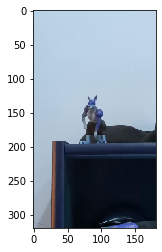

In [5]:
reference_frame = cv2.imread(imgs_path + fnames[0])
h,w = reference_frame.shape[:2]
plt.imshow(reference_frame)
plt.show()

reference_keypoint :  [ 90 162]


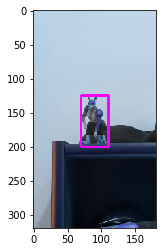

In [6]:
reference_frame_with_kp = reference_frame.copy()
x1,y1,x2,y2 = 70,125,110,200
window_w, window_h = x2-x1,y2-y1
reference_keypoint = np.array([(x2+x1)/2,(y2+y1)/2]).astype(int)
print('reference_keypoint : ', reference_keypoint)
cv2.rectangle(reference_frame_with_kp, (x1,y1),(x2,y2), (255,0,255),2)
plt.imshow(reference_frame_with_kp)
plt.show()

In [7]:
x2-x1,y2-y1

(40, 75)

In [8]:
x1_org,y1_org,x2_org,y2_org = x1,y1,x2,y2

In [9]:
rois = [];poses = []
for x in range(w-window_w-1):
    for y in range(h-window_h-1):
        x1,x2,y1,y2 = x,x+window_w,y,y+window_h
        roi = reference_frame[y1:y2,x1:x2].flatten()
        pose = [np.floor(window_w/2).astype(int)+x,np.floor(window_h/2).astype(int)+y]
        rois.append(roi)
        poses.append(pose)
rois = np.array(rois)   

In [10]:
rois.shape

(33916, 9000)

In [11]:
pca = PCA(n_components=128)
reference_frame_features = pca.fit_transform(rois.reshape(rois.shape[0],-1))
print('Shape of features sets : ', reference_frame_features.shape)
kp_index = np.where((np.array(poses).T[0]== reference_keypoint[0]) & (np.array(poses).T[1]== reference_keypoint[1]))[0][0]
print('Index of keypoint in pose: ', kp_index)
print('Shape of reference feature set : ', reference_frame_features[kp_index].shape)
print('Reference features : ', reference_frame_features[kp_index])

Shape of features sets :  (33916, 128)
Index of keypoint in pose:  17205
Shape of reference feature set :  (128,)
Reference features :  [ 1.51867325e+03  2.10467252e+03  3.77952532e+01  1.73449111e+03
  3.20601870e-01 -1.72045088e+03 -1.36192553e+03  9.13489934e+01
  7.28381455e+02  3.14700580e+02  3.56791643e+02  8.89231478e+01
 -9.43732967e+02 -8.61210068e+01  6.22711169e+02 -1.33904417e+03
 -7.11454850e+02 -4.17581776e+02 -1.33974230e+02 -5.55616223e+02
  9.71258386e+01 -8.52510245e-01 -5.18281285e+02  7.75373745e+02
 -8.11053975e+01  6.60978086e+01 -6.98724866e+02 -5.30938785e+02
  5.75723753e+02 -4.80376365e+02 -1.23408475e+01  3.16410999e+02
 -3.91551394e+02 -1.09943487e+02  2.99372520e+01 -6.09484806e+01
 -4.81192580e+02  4.81810630e+02  5.59704607e+01 -1.67022382e+02
 -5.03847013e+01 -1.11780112e+01  5.06118979e+02 -2.69053787e+02
  1.82038328e+02 -3.88646333e+02  1.04032433e+02 -3.64562344e+02
 -8.81458049e+01 -2.95890610e+02  2.91491511e+00 -1.65420170e+01
  5.32635083e+02 -5

In [12]:
save_visu_path = 'result_visualization/'
if os.path.exists(save_visu_path) == False:
    os.mkdir(save_visu_path)
    
if os.path.exists('result_visualization_before') == False:
    os.mkdir('result_visualization_before')
    
if os.path.exists('Optical_flow/') == False:
    os.mkdir('Optical_flow/')
if os.path.exists('LK_kp_visu/') == False:
    os.mkdir('LK_kp_visu/')

Start tracking tracked frame : 1


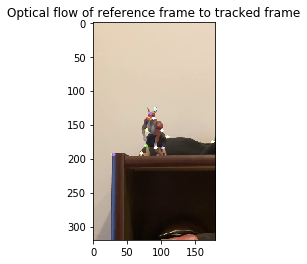

Minimum SSR position ：  17205 , with value :  172819.4016396693 , Shape of SSRs map :  (33916,)
Feature points number of reference frame: 11 , current tracked frame : 11


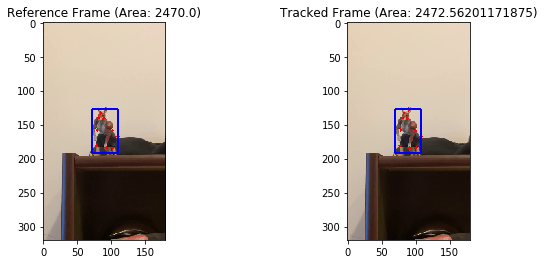

Width comparison 38.0 to 37.980576
Height comparison 65.0 to 65.1007


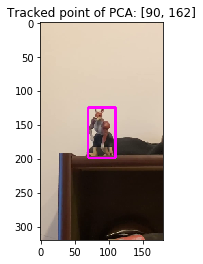

--------------------------------------------------------------------------------------------------------
Start tracking tracked frame : 2


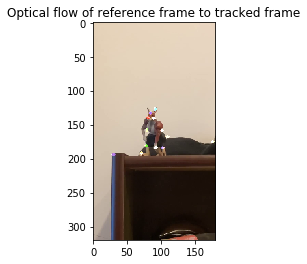

Minimum SSR position ：  17205 , with value :  435317.21491009323 , Shape of SSRs map :  (33916,)
Feature points number of reference frame: 11 , current tracked frame : 11


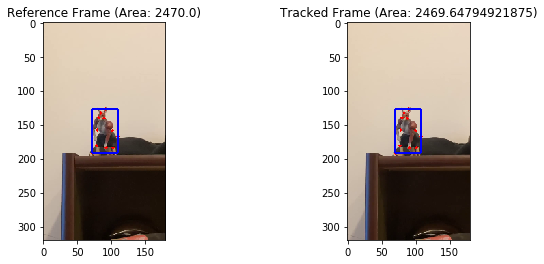

Width comparison 38.0 to 37.972237
Height comparison 65.0 to 65.038246


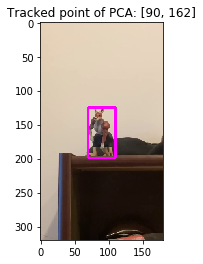

--------------------------------------------------------------------------------------------------------
Start tracking tracked frame : 3


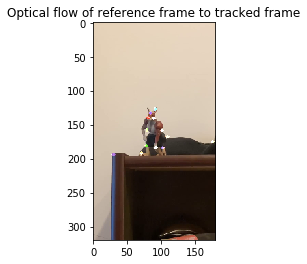

Minimum SSR position ：  17205 , with value :  293939.6391360464 , Shape of SSRs map :  (33916,)
Feature points number of reference frame: 11 , current tracked frame : 11


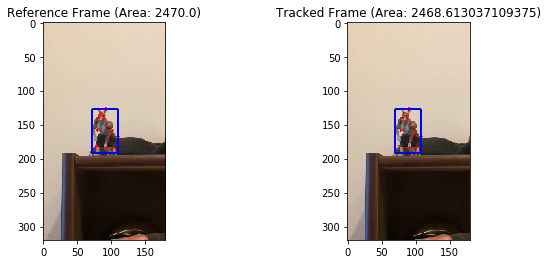

Width comparison 38.0 to 37.94017
Height comparison 65.0 to 65.06595


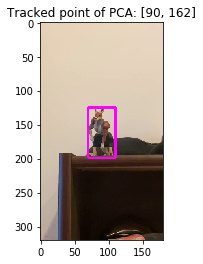

--------------------------------------------------------------------------------------------------------
Start tracking tracked frame : 4


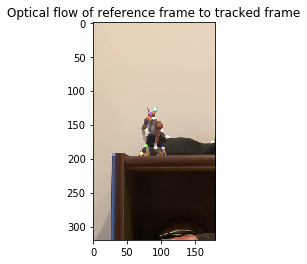

Minimum SSR position ：  17205 , with value :  367003.82584266923 , Shape of SSRs map :  (33916,)
Feature points number of reference frame: 11 , current tracked frame : 11


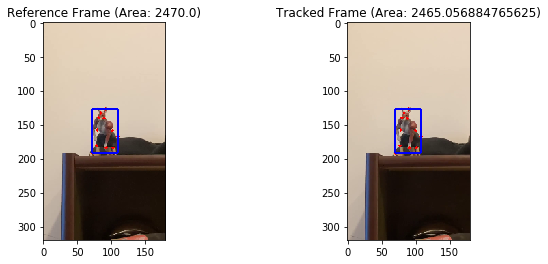

Width comparison 38.0 to 37.905106
Height comparison 65.0 to 65.032326


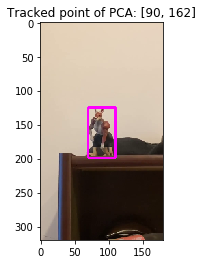

--------------------------------------------------------------------------------------------------------
Start tracking tracked frame : 5


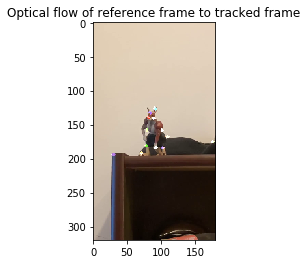

Minimum SSR position ：  17205 , with value :  411796.4353791734 , Shape of SSRs map :  (33916,)
Feature points number of reference frame: 11 , current tracked frame : 11


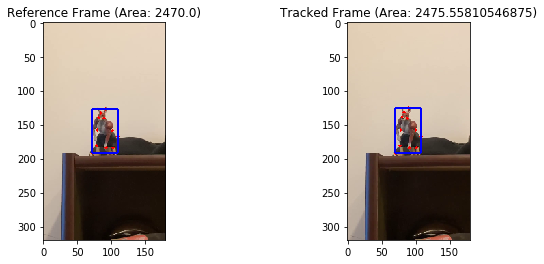

Width comparison 38.0 to 37.968742
Height comparison 65.0 to 65.19988


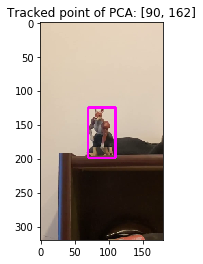

--------------------------------------------------------------------------------------------------------
Start tracking tracked frame : 6


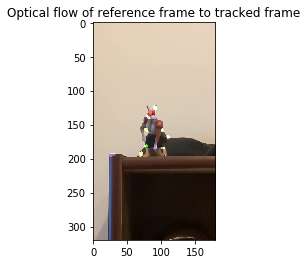

Minimum SSR position ：  16961 , with value :  1999630.0831078724 , Shape of SSRs map :  (33916,)
Feature points number of reference frame: 11 , current tracked frame : 9


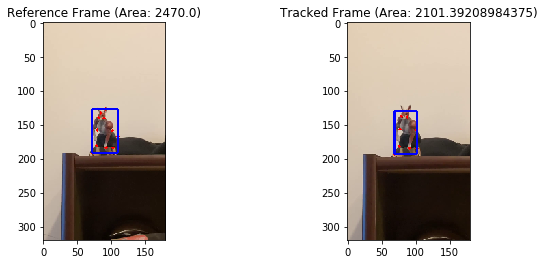

Width comparison 38.0 to 33.209755
Height comparison 65.0 to 63.276352


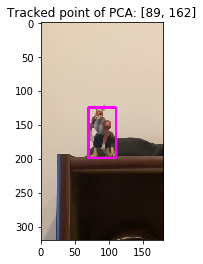

Minimum SSR position ：  1778 , with value :  485386.5471886485 , Shape of SSRs map :  (3239,)


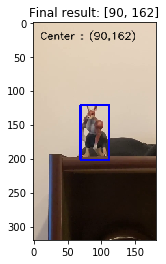

--------------------------------------------------------------------------------------------------------
Start tracking tracked frame : 7


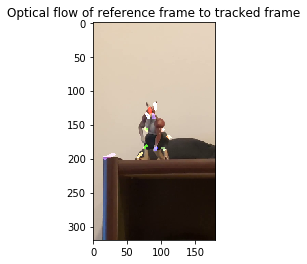

Minimum SSR position ：  16957 , with value :  9922580.816576656 , Shape of SSRs map :  (33916,)
Feature points number of reference frame: 11 , current tracked frame : 8


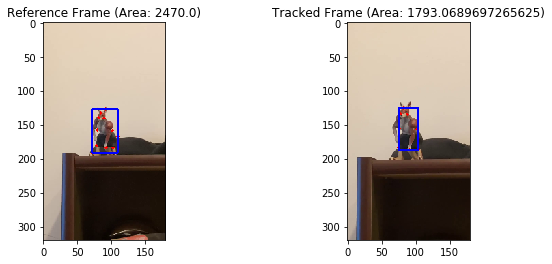

Width comparison 38.0 to 29.193352
Height comparison 65.0 to 61.420456


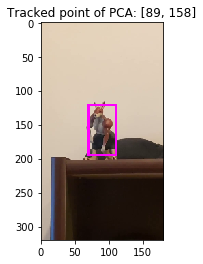

Minimum SSR position ：  2185 , with value :  372705.2079382247 , Shape of SSRs map :  (4183,)


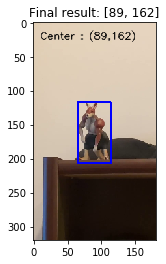

--------------------------------------------------------------------------------------------------------
Start tracking tracked frame : 8


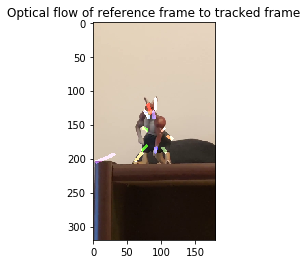

Minimum SSR position ：  16949 , with value :  16343005.36701316 , Shape of SSRs map :  (33916,)
Feature points number of reference frame: 11 , current tracked frame : 5


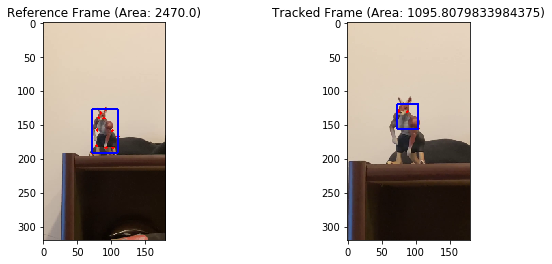

Width comparison 38.0 to 30.445686
Height comparison 65.0 to 35.992233


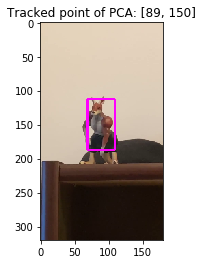

Minimum SSR position ：  2919 , with value :  397982.6055096331 , Shape of SSRs map :  (5508,)


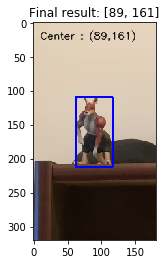

--------------------------------------------------------------------------------------------------------
Start tracking tracked frame : 9


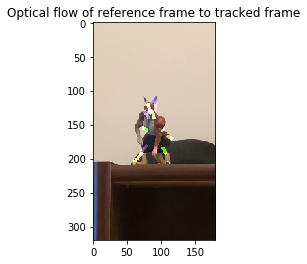

Minimum SSR position ：  16705 , with value :  16477644.225157648 , Shape of SSRs map :  (33916,)
Feature points number of reference frame: 11 , current tracked frame : 5


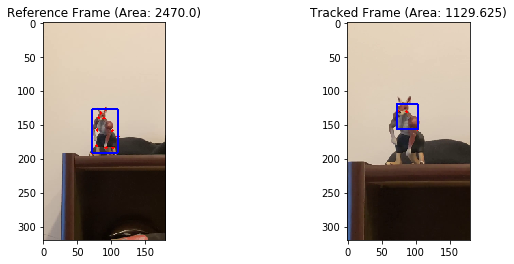

Width comparison 38.0 to 30.858055
Height comparison 65.0 to 36.607147


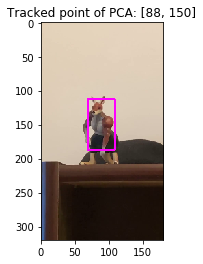

Minimum SSR position ：  2977 , with value :  360275.47110196156 , Shape of SSRs map :  (5720,)


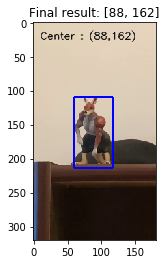

--------------------------------------------------------------------------------------------------------
Start tracking tracked frame : 10


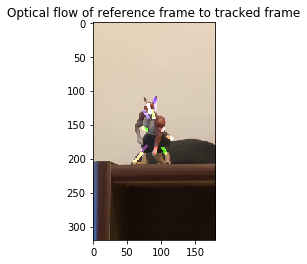

Minimum SSR position ：  16705 , with value :  16407258.266866218 , Shape of SSRs map :  (33916,)
Feature points number of reference frame: 11 , current tracked frame : 5


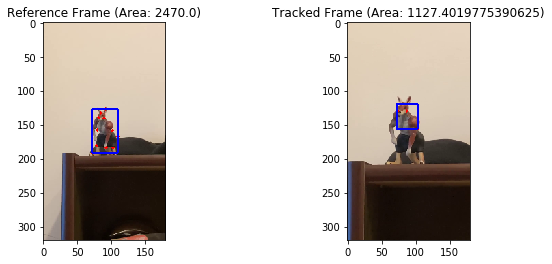

Width comparison 38.0 to 30.840912
Height comparison 65.0 to 36.555412


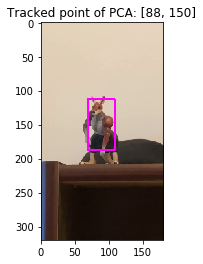

Minimum SSR position ：  2977 , with value :  355817.14828587277 , Shape of SSRs map :  (5720,)


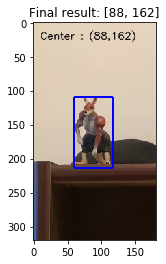

--------------------------------------------------------------------------------------------------------
Start tracking tracked frame : 11


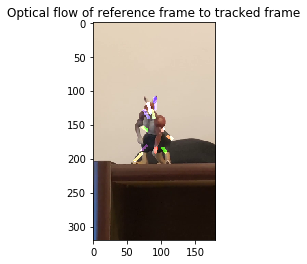

Minimum SSR position ：  16704 , with value :  16480777.67727911 , Shape of SSRs map :  (33916,)
Feature points number of reference frame: 11 , current tracked frame : 5


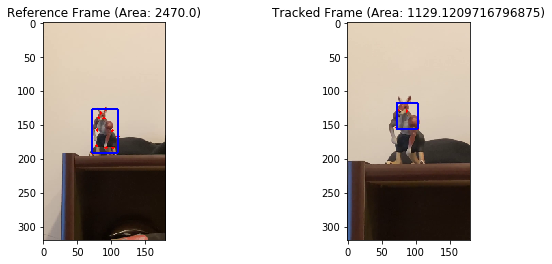

Width comparison 38.0 to 30.884544
Height comparison 65.0 to 36.559425


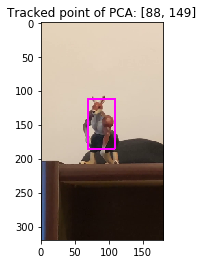

Minimum SSR position ：  3081 , with value :  322672.76844281994 , Shape of SSRs map :  (5720,)


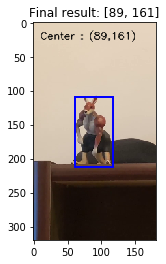

--------------------------------------------------------------------------------------------------------
Start tracking tracked frame : 12


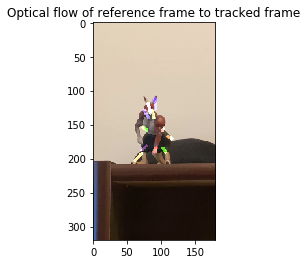

Minimum SSR position ：  16704 , with value :  16510984.017787274 , Shape of SSRs map :  (33916,)
Feature points number of reference frame: 11 , current tracked frame : 5


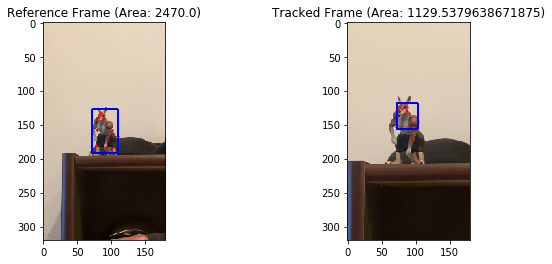

Width comparison 38.0 to 30.883842
Height comparison 65.0 to 36.573753


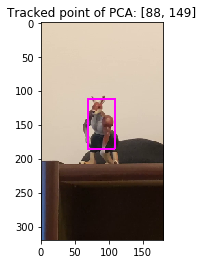

Minimum SSR position ：  2977 , with value :  306478.52176614513 , Shape of SSRs map :  (5720,)


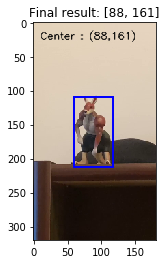

--------------------------------------------------------------------------------------------------------
Start tracking tracked frame : 13


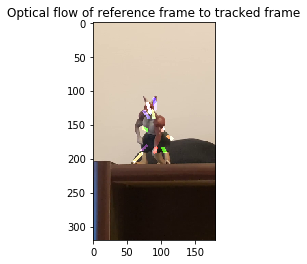

Minimum SSR position ：  16704 , with value :  16589978.209279303 , Shape of SSRs map :  (33916,)
Feature points number of reference frame: 11 , current tracked frame : 5


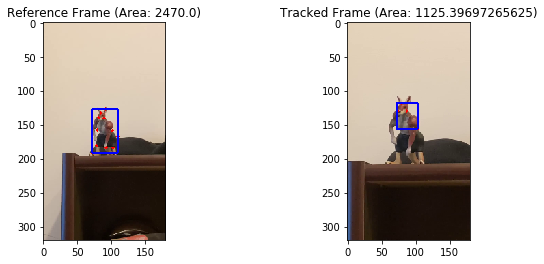

Width comparison 38.0 to 30.858063
Height comparison 65.0 to 36.4701


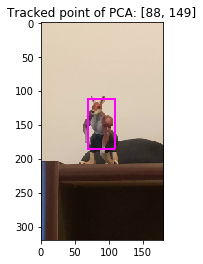

Minimum SSR position ：  2977 , with value :  142235.31463368205 , Shape of SSRs map :  (5720,)


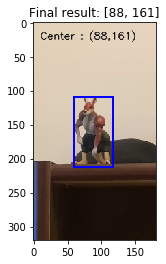

--------------------------------------------------------------------------------------------------------
Start tracking tracked frame : 14


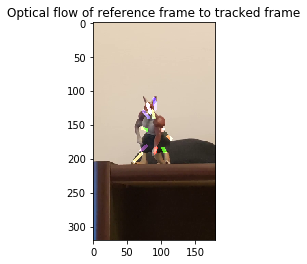

Minimum SSR position ：  16461 , with value :  16568154.43287057 , Shape of SSRs map :  (33916,)
Feature points number of reference frame: 11 , current tracked frame : 5


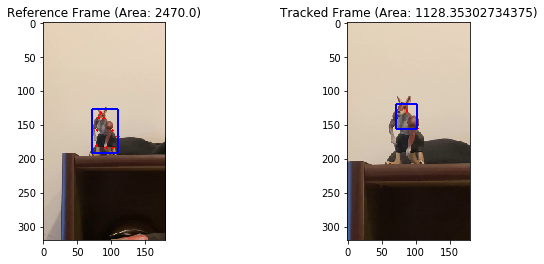

Width comparison 38.0 to 30.99601
Height comparison 65.0 to 36.403175


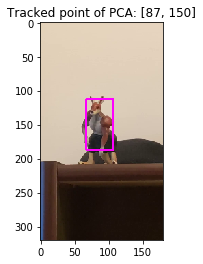

Minimum SSR position ：  3080 , with value :  202262.08425377196 , Shape of SSRs map :  (5720,)


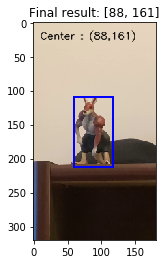

--------------------------------------------------------------------------------------------------------
Start tracking tracked frame : 15


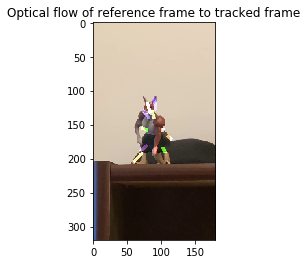

Minimum SSR position ：  16461 , with value :  16606752.761246048 , Shape of SSRs map :  (33916,)
Feature points number of reference frame: 11 , current tracked frame : 5


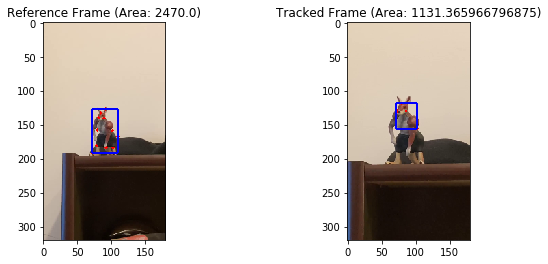

Width comparison 38.0 to 30.940437
Height comparison 65.0 to 36.56594


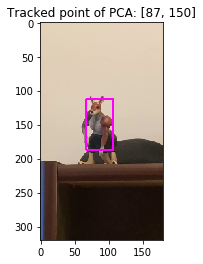

Minimum SSR position ：  3080 , with value :  259340.00542714732 , Shape of SSRs map :  (5720,)


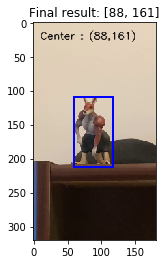

--------------------------------------------------------------------------------------------------------
Start tracking tracked frame : 16


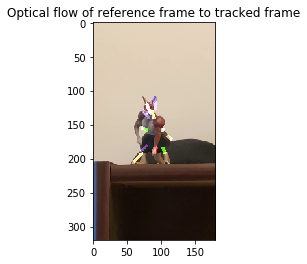

Minimum SSR position ：  16461 , with value :  16485864.357485313 , Shape of SSRs map :  (33916,)
Feature points number of reference frame: 11 , current tracked frame : 5


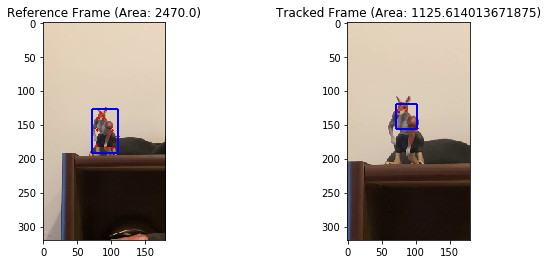

Width comparison 38.0 to 30.851364
Height comparison 65.0 to 36.48507


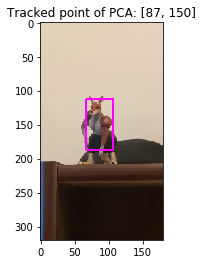

Minimum SSR position ：  2976 , with value :  249359.33615017106 , Shape of SSRs map :  (5720,)


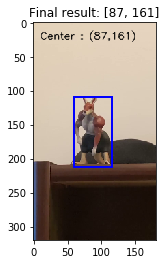

--------------------------------------------------------------------------------------------------------
Start tracking tracked frame : 17


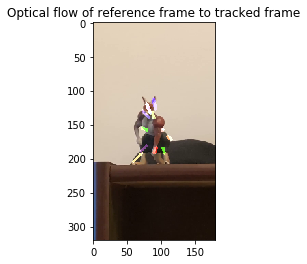

Minimum SSR position ：  16217 , with value :  16681535.728980238 , Shape of SSRs map :  (33916,)
Feature points number of reference frame: 11 , current tracked frame : 5


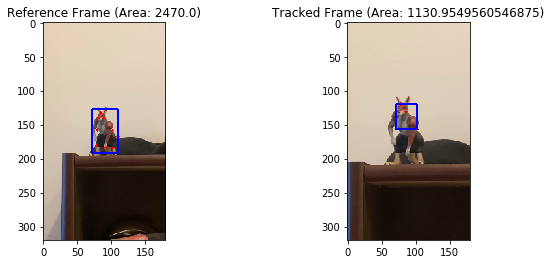

Width comparison 38.0 to 31.024818
Height comparison 65.0 to 36.45324


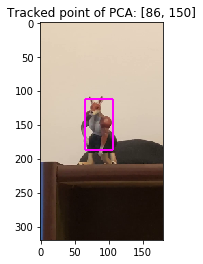

Minimum SSR position ：  3081 , with value :  208085.23299939232 , Shape of SSRs map :  (5720,)


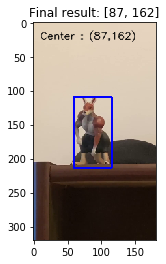

--------------------------------------------------------------------------------------------------------
Start tracking tracked frame : 18


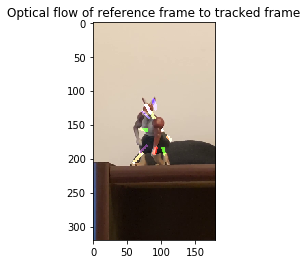

Minimum SSR position ：  16218 , with value :  16343913.577704959 , Shape of SSRs map :  (33916,)
Feature points number of reference frame: 11 , current tracked frame : 5


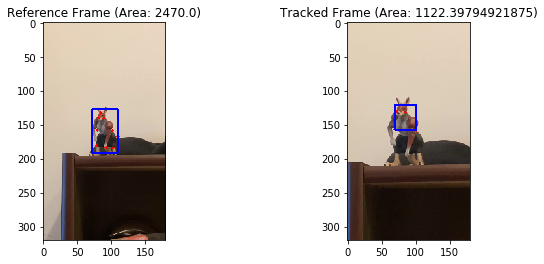

Width comparison 38.0 to 30.884224
Height comparison 65.0 to 36.342102


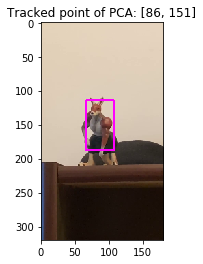

Minimum SSR position ：  2949 , with value :  491853.79086553946 , Shape of SSRs map :  (5665,)


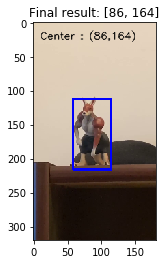

--------------------------------------------------------------------------------------------------------
Start tracking tracked frame : 19


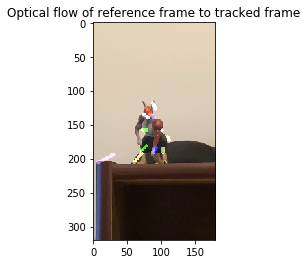

Minimum SSR position ：  15981 , with value :  14908537.696605183 , Shape of SSRs map :  (33916,)
Feature points number of reference frame: 11 , current tracked frame : 8


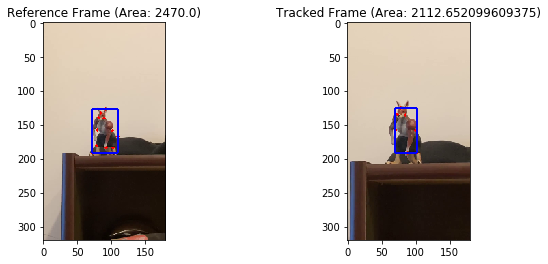

Width comparison 38.0 to 31.831581
Height comparison 65.0 to 66.369675


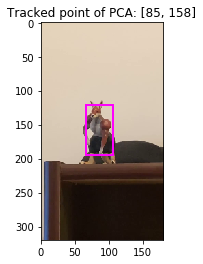

Minimum SSR position ：  2743 , with value :  307973.4103121487 , Shape of SSRs map :  (4992,)


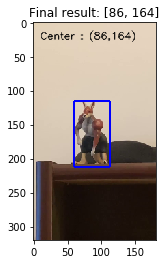

--------------------------------------------------------------------------------------------------------
Start tracking tracked frame : 20


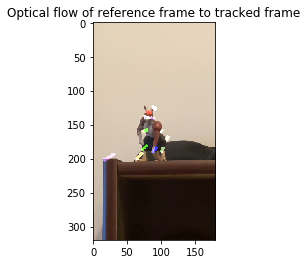

Minimum SSR position ：  16230 , with value :  7439804.702721185 , Shape of SSRs map :  (33916,)
Feature points number of reference frame: 11 , current tracked frame : 8


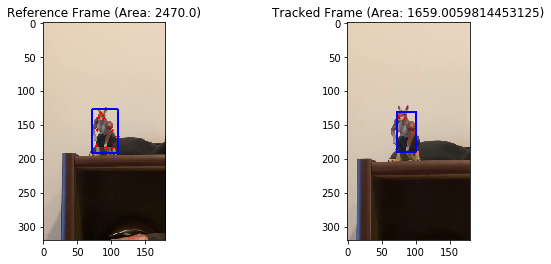

Width comparison 38.0 to 28.046738
Height comparison 65.0 to 59.15149


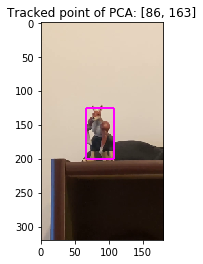

Minimum SSR position ：  2001 , with value :  495870.21637042915 , Shape of SSRs map :  (3825,)


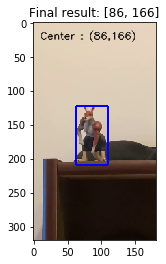

--------------------------------------------------------------------------------------------------------
Start tracking tracked frame : 21


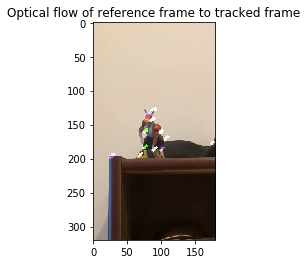

Minimum SSR position ：  16233 , with value :  408194.0902802823 , Shape of SSRs map :  (33916,)
Feature points number of reference frame: 11 , current tracked frame : 11


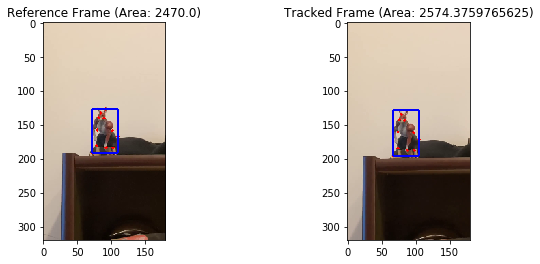

Width comparison 38.0 to 38.53512
Height comparison 65.0 to 66.805984


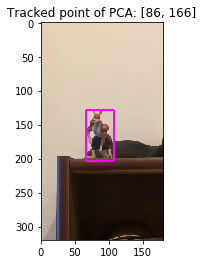

--------------------------------------------------------------------------------------------------------
Start tracking tracked frame : 22


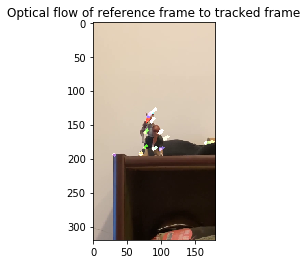

Minimum SSR position ：  16477 , with value :  2400617.5851054513 , Shape of SSRs map :  (33916,)
Feature points number of reference frame: 11 , current tracked frame : 11


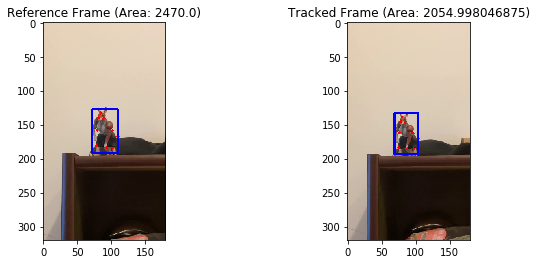

Width comparison 38.0 to 34.316277
Height comparison 65.0 to 59.884064


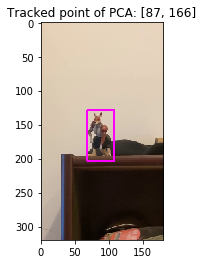

Minimum SSR position ：  7 , with value :  410168.1772499962 , Shape of SSRs map :  (12,)


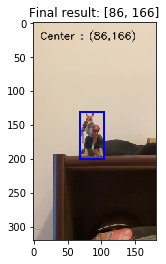

--------------------------------------------------------------------------------------------------------
Start tracking tracked frame : 23


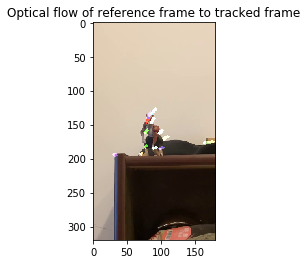

Minimum SSR position ：  16478 , with value :  3496033.7370578907 , Shape of SSRs map :  (33916,)
Feature points number of reference frame: 11 , current tracked frame : 11


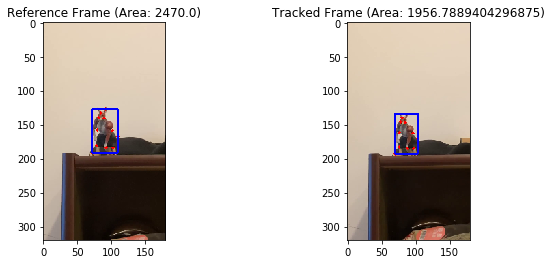

Width comparison 38.0 to 33.462433
Height comparison 65.0 to 58.47719


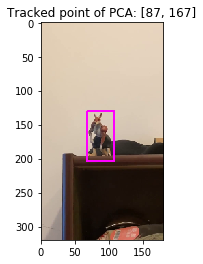

Minimum SSR position ：  15 , with value :  224955.13506071124 , Shape of SSRs map :  (24,)


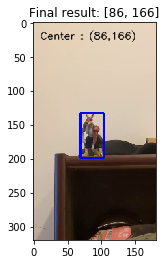

--------------------------------------------------------------------------------------------------------
Start tracking tracked frame : 24


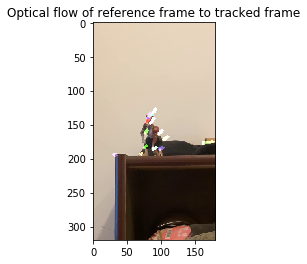

Minimum SSR position ：  16479 , with value :  4485359.969159279 , Shape of SSRs map :  (33916,)
Feature points number of reference frame: 11 , current tracked frame : 11


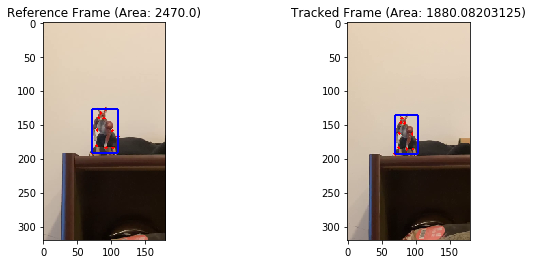

Width comparison 38.0 to 32.790375
Height comparison 65.0 to 57.336395


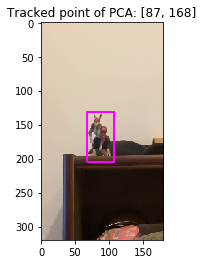

Minimum SSR position ：  18 , with value :  436268.25423903053 , Shape of SSRs map :  (35,)


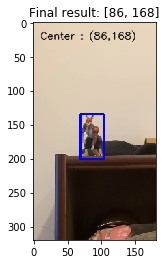

--------------------------------------------------------------------------------------------------------
Start tracking tracked frame : 25


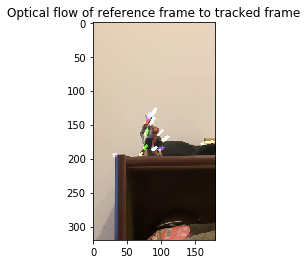

Minimum SSR position ：  16236 , with value :  4717332.260226432 , Shape of SSRs map :  (33916,)
Feature points number of reference frame: 11 , current tracked frame : 11


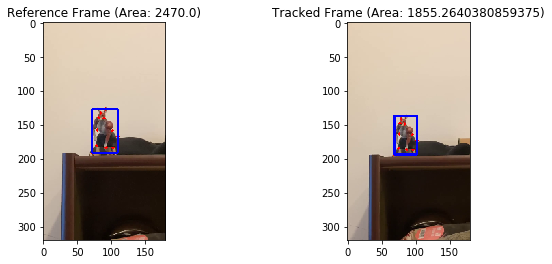

Width comparison 38.0 to 32.578392
Height comparison 65.0 to 56.947678


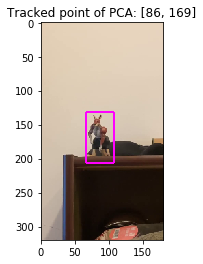

Minimum SSR position ：  28 , with value :  768209.6752445573 , Shape of SSRs map :  (40,)


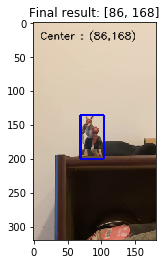

--------------------------------------------------------------------------------------------------------
Start tracking tracked frame : 26


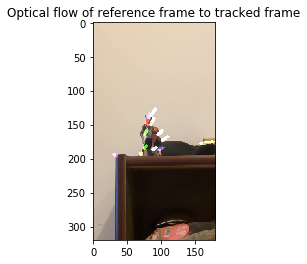

Minimum SSR position ：  16236 , with value :  5621131.3367868755 , Shape of SSRs map :  (33916,)
Feature points number of reference frame: 11 , current tracked frame : 11


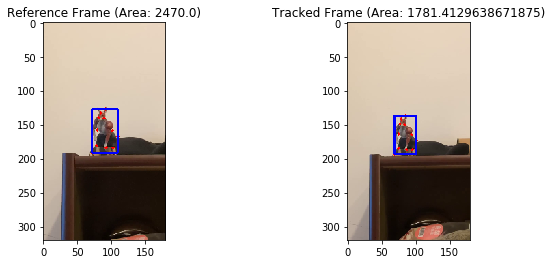

Width comparison 38.0 to 31.779724
Height comparison 65.0 to 56.055008


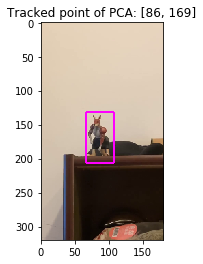

Minimum SSR position ：  31 , with value :  867351.0873190048 , Shape of SSRs map :  (54,)


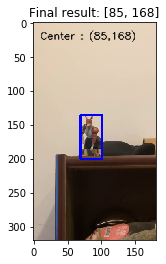

--------------------------------------------------------------------------------------------------------
Start tracking tracked frame : 27


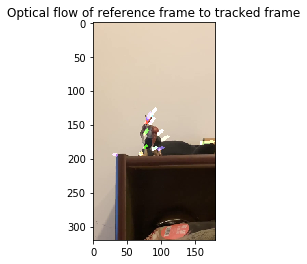

Minimum SSR position ：  16235 , with value :  5987392.237315301 , Shape of SSRs map :  (33916,)
Feature points number of reference frame: 11 , current tracked frame : 11


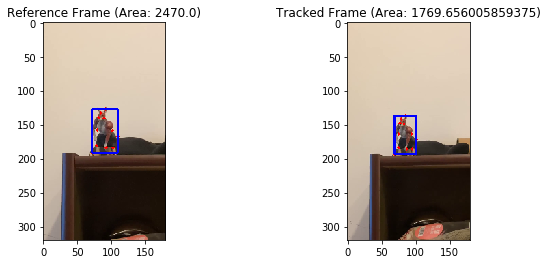

Width comparison 38.0 to 31.655907
Height comparison 65.0 to 55.902878


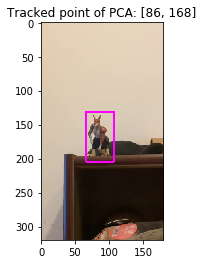

Minimum SSR position ：  32 , with value :  793361.9989519378 , Shape of SSRs map :  (54,)


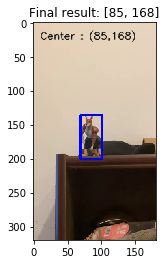

--------------------------------------------------------------------------------------------------------
Start tracking tracked frame : 28


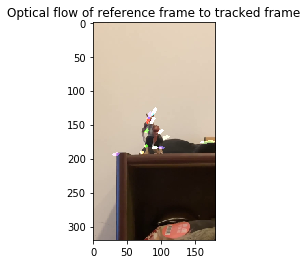

Minimum SSR position ：  16721 , with value :  6038058.52784865 , Shape of SSRs map :  (33916,)
Feature points number of reference frame: 11 , current tracked frame : 11


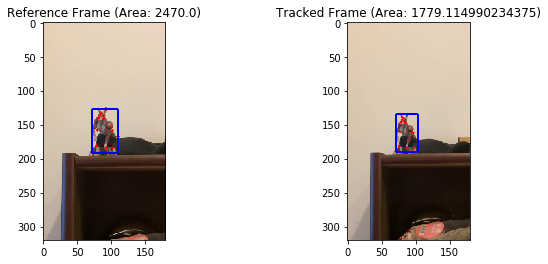

Width comparison 38.0 to 31.862846
Height comparison 65.0 to 55.836655


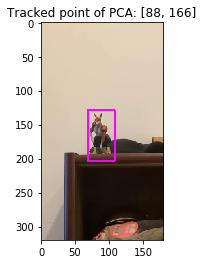

Minimum SSR position ：  23 , with value :  527618.2341475583 , Shape of SSRs map :  (54,)


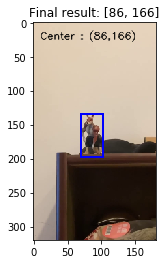

--------------------------------------------------------------------------------------------------------
Start tracking tracked frame : 29


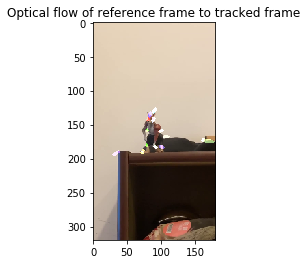

Minimum SSR position ：  16963 , with value :  5931962.0764488615 , Shape of SSRs map :  (33916,)
Feature points number of reference frame: 11 , current tracked frame : 11


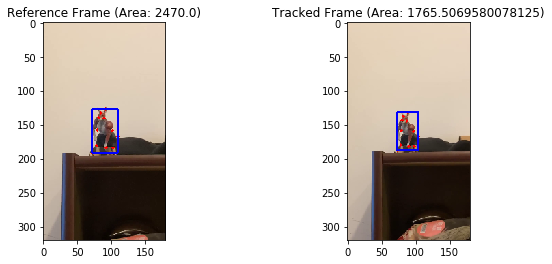

Width comparison 38.0 to 31.6904
Height comparison 65.0 to 55.711105


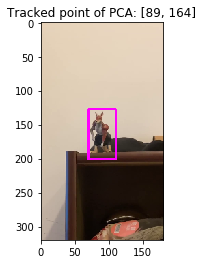

Minimum SSR position ：  31 , with value :  644528.2575253845 , Shape of SSRs map :  (54,)


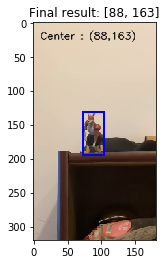

--------------------------------------------------------------------------------------------------------
Start tracking tracked frame : 30


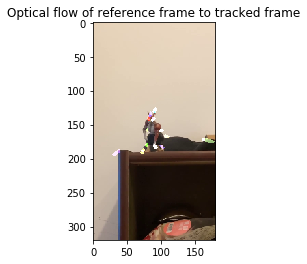

Minimum SSR position ：  17206 , with value :  6261267.2460847795 , Shape of SSRs map :  (33916,)
Feature points number of reference frame: 11 , current tracked frame : 11


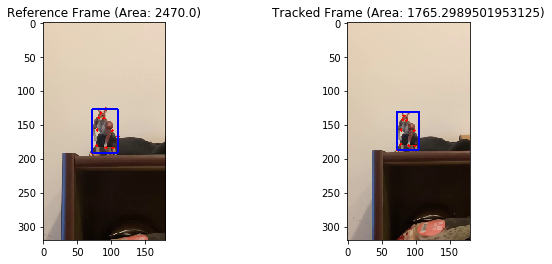

Width comparison 38.0 to 31.716827
Height comparison 65.0 to 55.658127


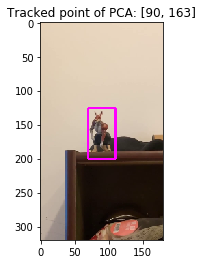

Minimum SSR position ：  23 , with value :  554103.4772227639 , Shape of SSRs map :  (54,)


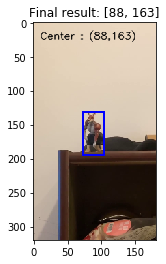

--------------------------------------------------------------------------------------------------------
Start tracking tracked frame : 31


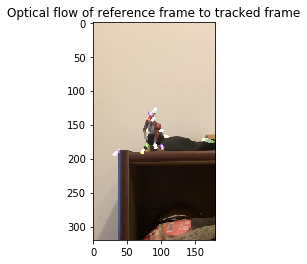

Minimum SSR position ：  17206 , with value :  6103596.6274159225 , Shape of SSRs map :  (33916,)
Feature points number of reference frame: 11 , current tracked frame : 11


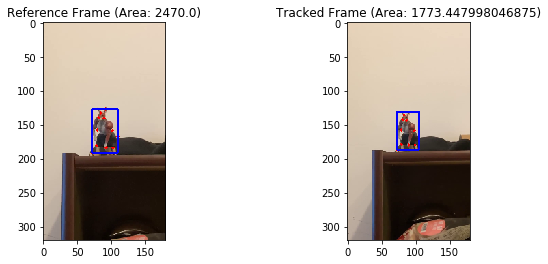

Width comparison 38.0 to 31.74218
Height comparison 65.0 to 55.870377


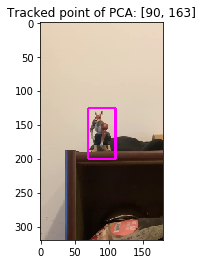

Minimum SSR position ：  22 , with value :  867841.5984953959 , Shape of SSRs map :  (54,)


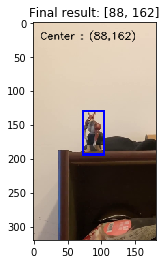

--------------------------------------------------------------------------------------------------------


In [13]:
def bbox_of_multi_points(array_2D):
    return np.min(array_2D.T[0]),np.max(array_2D.T[0]),np.min(array_2D.T[1]),np.max(array_2D.T[1])
num_tracked_frame = len(fnames)-1
reference_frame_gray = cv2.cvtColor(reference_frame, cv2.COLOR_BGR2GRAY)
size_of_window = np.zeros((num_tracked_frame,2,2)) # h,w
SSR_per_frame = np.zeros((num_tracked_frame,2)) # if size changes, the second search will be execute. Therefore, two ssr are got.

for frame_index in range(num_tracked_frame):
    print('Start tracking tracked frame :', frame_index+1)
    tracked_frame = cv2.imread(imgs_path + fnames[frame_index+1])
    # ----------------------------------------------------------------------------------
    # LK algorithm part
    mask = np.zeros_like(reference_frame)
    tracked_frame_gray = cv2.cvtColor(tracked_frame, cv2.COLOR_BGR2GRAY)
    p0 = cv2.goodFeaturesToTrack(reference_frame_gray, mask = None,
                             **feature_params)
    p1, st, err = cv2.calcOpticalFlowPyrLK(reference_frame_gray, tracked_frame_gray,
                                           p0, None, **lk_params)    
    
    good_new = p1[st == 1] ; good_old = p0[st == 1]
    tracked_frame_LK = tracked_frame.copy()
    for i, (new, old) in enumerate(zip(good_new,good_old)):
        a, b = new.ravel() # LK keypoints of last frame
        c, d = old.ravel() # LK keypoints of current frame
        mask = cv2.line(mask, (a, b), (c, d),
                        color[i].tolist(), 4)
    tracked_frame_LK = cv2.add(tracked_frame_LK, mask)
    plt.imshow(cv2.cvtColor(tracked_frame_LK, cv2.COLOR_BGR2RGB))
    plt.title('Optical flow of reference frame to tracked frame')
    plt.show()
    cv2.imwrite('Optical_flow/'+ fnames[frame_index+1], tracked_frame_LK)
    # ----------------------------------------------------------------------------------
    # Feature tracking part
    crops = []
    for x in range(w-window_w-1):
        for y in range(h-window_h-1):
            x1,x2,y1,y2 = x,x+window_w,y,y+window_h
            crop = tracked_frame[y1:y2,x1:x2].flatten()
            crops.append(crop)
    crops = np.array(crops)
    tracked_frame_features = pca.transform(crops) # Feature extraction by PCA
    ssrs = np.sum((tracked_frame_features - reference_frame_features[kp_index])**2,axis = 1)
    print('Minimum SSR position ： ', np.argmin(ssrs),', with value : ',np.min(ssrs),', Shape of SSRs map : ', ssrs.shape)
    tracked_keypoint = poses[np.argmin(ssrs)]
    tracked_x1,tracked_x2 = tracked_keypoint[0] - window_w//2, tracked_keypoint[0] + window_w//2
    tracked_y1,tracked_y2 = tracked_keypoint[1] - window_h//2, tracked_keypoint[1] + window_h//2
    # ---------------------------------------------------------------------------------------
    
    inside_posi_org = np.where((good_old.T[0] >x1_org) & (good_old.T[0] < x2_org)&
                           (good_old.T[1] >y1_org) & (good_old.T[1] < y2_org))
    
    inside_posi_current = np.where((good_new.T[0] > tracked_x1) & (good_new.T[0] < tracked_x2) &
                                   (good_new.T[1] > tracked_y1) & (good_new.T[1] < tracked_y2))
    
    print('Feature points number of reference frame:',len(inside_posi_org[0]),
          ', current tracked frame :',len(inside_posi_current[0]))
    
    reference_frame_LKkp_show = reference_frame.copy()
    tracked_frame_LKkp_show = tracked_frame.copy()
    good_old_inside = good_old[inside_posi_org]
    plt.figure(figsize = (10,4))
    for i in range(len(inside_posi_org[0])):
        cv2.circle(reference_frame_LKkp_show,
                   (int(good_old_inside[i][0]),int(good_old_inside[i][1])),2,(0,0,255),-1)  
    rec_x1,rec_x2,rec_y1,rec_y2 = bbox_of_multi_points(good_old_inside)
    lk_kp_visu = reference_frame_LKkp_show.copy()
    cv2.rectangle(reference_frame_LKkp_show,(int(rec_x1),int(rec_y1)),(int(rec_x2),int(rec_y2)),(255,0,0),2)
    plt.subplot(1,2,1), plt.imshow(cv2.cvtColor(reference_frame_LKkp_show, cv2.COLOR_BGR2RGB))
    area = round((rec_x2-rec_x1)*(rec_y2-rec_y1),3)
    ref_LK_w,ref_LK_h = rec_x2-rec_x1,rec_y2-rec_y1
    plt.title('Reference Frame (Area: {})'.format(area))
    good_new_inside = good_new[inside_posi_current]
    for i in range(len(inside_posi_current[0])):
        cv2.circle(tracked_frame_LKkp_show,
                   (int(good_new_inside[i][0]),int(good_new_inside[i][1])),2,(0,0,255),-1)  
    rec_x1,rec_x2,rec_y1,rec_y2 = bbox_of_multi_points(good_new[inside_posi_current])
    lk_kp_visu = np.hstack([lk_kp_visu,tracked_frame_LKkp_show])
    cv2.rectangle(tracked_frame_LKkp_show,(int(rec_x1),int(rec_y1)),(int(rec_x2),int(rec_y2)),(255,0,0),2)
    plt.subplot(1,2,2),plt.imshow(cv2.cvtColor(tracked_frame_LKkp_show, cv2.COLOR_BGR2RGB))
    area = round((rec_x2-rec_x1)*(rec_y2-rec_y1),3)
    track_LK_w,track_LK_h = rec_x2-rec_x1,rec_y2-rec_y1
    plt.title('Tracked Frame (Area: {})'.format(area))
    plt.show()       
    cv2.imwrite('LK_kp_visu/'+ fnames[frame_index+1], lk_kp_visu)
    print('Width comparison', ref_LK_w, 'to' ,track_LK_w)
    print('Height comparison', ref_LK_h, 'to' ,track_LK_h)
    # ---------------------------------------------------------------------------------------
    tracked_frame_features_with_tracked_kp = tracked_frame.copy()
    tracked_frame_features_with_tracked_kp = cv2.rectangle(tracked_frame_features_with_tracked_kp, 
                                                           (tracked_x1,tracked_y1),(tracked_x2,tracked_y2), (255,0,255),2)
    plt.imshow(cv2.cvtColor(tracked_frame_features_with_tracked_kp, cv2.COLOR_BGR2RGB))
    plt.title('Tracked point of PCA: {}'.format(tracked_keypoint))
    plt.show()
    # ---------------------------------------------------------------------------------------
    SSR_per_frame[frame_index][0] = np.min(ssrs)
    
    
# -------------------------------------------------------------------------------------------------------------------------------
    # <Second search section>
    region_track = False
    if len(inside_posi_org[0]) == len(inside_posi_current[0]):
        '''
        if the keypoints number of ref and tracked are same, there're two condition:
            1. object becomes smaller (far).
            2. object is same size ==> in this event we dont need to execute any progress if object sizes are same.
        '''
        if (int(np.ceil(track_LK_w)) < int(np.ceil(ref_LK_w))) or (int(np.ceil(track_LK_h)) < int(np.ceil(ref_LK_h))): # object become smaller
            region_track = True
            ratio_LK_w,ratio_LK_h = track_LK_w/ref_LK_w,track_LK_h/ref_LK_h
            window_w_adjusted,window_h_adjusted = int(window_w*ratio_LK_w),int(window_h*ratio_LK_h)
            region_focused = tracked_frame[tracked_y1:tracked_y2,tracked_x1:tracked_x2]
            h_region,w_region = region_focused.shape[:2]
            tracked_frame_with_tracked_kp = tracked_frame.copy()
            crops = [] ; region_poses = []
            for x in range(w_region-window_w_adjusted-1):
                for y in range(h_region-window_h_adjusted-1):
                    x1,x2,y1,y2 = x,x+window_w_adjusted,y,y+window_h_adjusted
                    crop = cv2.resize(region_focused[y1:y2,x1:x2],(window_w,window_h))
                    crop = crop.flatten()
                    crops.append(crop)
                    region_poses.append([(x2+x1)//2,(y2+y1)//2])
            crops = np.array(crops)
            region_features = pca.transform(crops) # Feature extraction by PCA
            ssrs = np.sum((region_features - reference_frame_features[kp_index])**2,axis = 1)
            print('Minimum SSR position ： ', np.argmin(ssrs),', with value : ',np.min(ssrs),', Shape of SSRs map : ', ssrs.shape)
            x_region,y_region = region_poses[np.argmin(ssrs)]
            new_tracked = [tracked_x1 + x_region,tracked_y1 + y_region]
            tracked_x1,tracked_x2 = new_tracked[0] - window_w_adjusted//2, new_tracked[0] + window_w_adjusted//2
            tracked_y1,tracked_y2 = new_tracked[1] - window_h_adjusted//2, new_tracked[1] + window_h_adjusted//2
            cv2.rectangle(tracked_frame_with_tracked_kp,(int(tracked_x1),int(tracked_y1)),
                          (int(tracked_x2),int(tracked_y2)),(255,0,0),2)
            text = 'Center : ({},{})'.format(new_tracked[0],new_tracked[1])
            
            cv2.putText(tracked_frame_with_tracked_kp, text, (10,25), 
                        cv2.FONT_HERSHEY_SIMPLEX,0.5, (0, 0, 0), 1, cv2.LINE_AA)            
            plt.imshow(cv2.cvtColor(tracked_frame_with_tracked_kp, cv2.COLOR_BGR2RGB))
            plt.title('Final result: {}'.format(new_tracked))
            plt.show()
    else:
        '''
        if the LK keypoints number in tracked frame is less than ref's, it means object becomes bigger (closer).    
        '''
        region_track = True
        inside_posi = np.intersect1d(inside_posi_org,inside_posi_current) # only take same elements
        good_new_inside = good_new[inside_posi]
        good_old_inside = good_old[inside_posi]
        rec_x1,rec_x2,rec_y1,rec_y2 = bbox_of_multi_points(good_old_inside)
        ref_LK_w,ref_LK_h = rec_x2-rec_x1,rec_y2-rec_y1
        rec_x1,rec_x2,rec_y1,rec_y2 = bbox_of_multi_points(good_new_inside)
        track_LK_w,track_LK_h = rec_x2-rec_x1,rec_y2-rec_y1
        ratio_LK_w,ratio_LK_h = track_LK_w/ref_LK_w,track_LK_h/ref_LK_h
        window_w_adjusted,window_h_adjusted = int(window_w*ratio_LK_w),int(window_h*ratio_LK_h)
        region_x1,region_x2 = tracked_keypoint[0]-window_w_adjusted, tracked_keypoint[0]+window_w_adjusted
        region_y1,region_y2 = tracked_keypoint[1]-window_h_adjusted, tracked_keypoint[1]+window_h_adjusted
        region_focused = tracked_frame[region_y1:region_y2,region_x1:region_x2]
        h_region,w_region = region_focused.shape[:2]
        tracked_frame_with_tracked_kp = tracked_frame.copy()
        crops = [] ; region_poses = []
        for x in range(w_region-window_w_adjusted-1):
            for y in range(h_region-window_h_adjusted-1):
                x1,x2,y1,y2 = x,x+window_w_adjusted,y,y+window_h_adjusted
                crop = cv2.resize(region_focused[y1:y2,x1:x2],(window_w,window_h))
                crop = crop.flatten()
                crops.append(crop)
                region_poses.append([(x2+x1)//2,(y2+y1)//2])
        crops = np.array(crops)
        region_features = pca.transform(crops) # Feature extraction by PCA
        ssrs = np.sum((region_features - reference_frame_features[kp_index])**2,axis = 1)
        print('Minimum SSR position ： ', np.argmin(ssrs),', with value : ',np.min(ssrs),', Shape of SSRs map : ', ssrs.shape)
        x_region,y_region = region_poses[np.argmin(ssrs)]
        new_tracked = [region_x1 + x_region,region_y1 + y_region]
        tracked_x1,tracked_x2 = new_tracked[0] - window_w_adjusted//2, new_tracked[0] + window_w_adjusted//2
        tracked_y1,tracked_y2 = new_tracked[1] - window_h_adjusted//2, new_tracked[1] + window_h_adjusted//2
        cv2.rectangle(tracked_frame_with_tracked_kp,(int(tracked_x1),int(tracked_y1)),
                      (int(tracked_x2),int(tracked_y2)),(255,0,0),2)
        text = 'Center : ({},{})'.format(new_tracked[0],new_tracked[1])
        cv2.putText(tracked_frame_with_tracked_kp, text, (10,25), 
                    cv2.FONT_HERSHEY_SIMPLEX,0.5, (0, 0, 0), 1, cv2.LINE_AA)
        
        plt.imshow(cv2.cvtColor(tracked_frame_with_tracked_kp, cv2.COLOR_BGR2RGB))
        plt.title('Final result: {}'.format(new_tracked))
        plt.show()
    print("--------------------------------------------------------------------------------------------------------")
    if region_track == False:
        size_of_window[frame_index][0] = np.array([window_w,window_h])
        size_of_window[frame_index][1] = np.array([window_w,window_h])
        text = 'Center : ({},{})'.format(tracked_keypoint[0],tracked_keypoint[1])
        cv2.putText(tracked_frame_features_with_tracked_kp, text, (10,25), 
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA) 
        cv2.imwrite('result_visualization_before/'+ fnames[frame_index+1], tracked_frame_features_with_tracked_kp)
        cv2.imwrite(save_visu_path+ fnames[frame_index+1], tracked_frame_features_with_tracked_kp)
    else:
        size_of_window[frame_index][0] = np.array([window_w,window_h])
        size_of_window[frame_index][1] = np.array([window_w_adjusted,window_h_adjusted])
        cv2.imwrite(save_visu_path+ fnames[frame_index+1], tracked_frame_with_tracked_kp)
        cv2.imwrite('result_visualization_before/'+ fnames[frame_index+1], tracked_frame_features_with_tracked_kp)
    SSR_per_frame[frame_index][1] = np.min(ssrs)

In [14]:

file = os.listdir(save_visu_path)
file.sort()
file.sort(key = lambda x: int(x[:-4]))

frames = []
for frame_index in range(len(file)):
    frames.append(cv2.cvtColor(cv2.imread(save_visu_path+file[frame_index]), cv2.COLOR_BGR2RGB))
with imageio.get_writer("tracked_result_after_adjust.gif", mode="I",fps=5) as writer:
    for idx, frame in enumerate(frames):
        print("Adding frame to GIF file: ", idx + 1)
        writer.append_data(frame)

Adding frame to GIF file:  1
Adding frame to GIF file:  2
Adding frame to GIF file:  3
Adding frame to GIF file:  4
Adding frame to GIF file:  5
Adding frame to GIF file:  6
Adding frame to GIF file:  7
Adding frame to GIF file:  8
Adding frame to GIF file:  9
Adding frame to GIF file:  10
Adding frame to GIF file:  11
Adding frame to GIF file:  12
Adding frame to GIF file:  13
Adding frame to GIF file:  14
Adding frame to GIF file:  15
Adding frame to GIF file:  16
Adding frame to GIF file:  17
Adding frame to GIF file:  18
Adding frame to GIF file:  19
Adding frame to GIF file:  20
Adding frame to GIF file:  21
Adding frame to GIF file:  22
Adding frame to GIF file:  23
Adding frame to GIF file:  24
Adding frame to GIF file:  25
Adding frame to GIF file:  26
Adding frame to GIF file:  27
Adding frame to GIF file:  28
Adding frame to GIF file:  29
Adding frame to GIF file:  30
Adding frame to GIF file:  31
Adding frame to GIF file:  32
Adding frame to GIF file:  33
Adding frame to GIF

In [18]:
file = os.listdir('result_visualization_before')
file.sort()
file.sort(key = lambda x: int(x[:-4]))

frames = []
for frame_index in range(len(file)):
    frames.append(cv2.cvtColor(cv2.imread('result_visualization_before/'+file[frame_index]), cv2.COLOR_BGR2RGB))
with imageio.get_writer("tracked_result_before_adjust.gif", mode="I",fps=5) as writer:
    for idx, frame in enumerate(frames):
        print("Adding frame to GIF file: ", idx + 1)
        writer.append_data(frame)

Adding frame to GIF file:  1
Adding frame to GIF file:  2
Adding frame to GIF file:  3
Adding frame to GIF file:  4
Adding frame to GIF file:  5
Adding frame to GIF file:  6
Adding frame to GIF file:  7
Adding frame to GIF file:  8
Adding frame to GIF file:  9
Adding frame to GIF file:  10
Adding frame to GIF file:  11
Adding frame to GIF file:  12
Adding frame to GIF file:  13
Adding frame to GIF file:  14
Adding frame to GIF file:  15
Adding frame to GIF file:  16
Adding frame to GIF file:  17
Adding frame to GIF file:  18
Adding frame to GIF file:  19
Adding frame to GIF file:  20
Adding frame to GIF file:  21
Adding frame to GIF file:  22
Adding frame to GIF file:  23
Adding frame to GIF file:  24
Adding frame to GIF file:  25
Adding frame to GIF file:  26
Adding frame to GIF file:  27
Adding frame to GIF file:  28
Adding frame to GIF file:  29
Adding frame to GIF file:  30
Adding frame to GIF file:  31


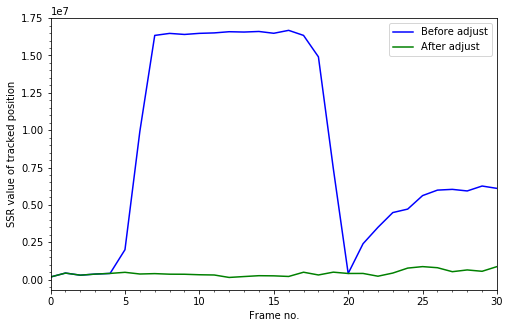

In [15]:
plt.figure(figsize = (8,5))
plt.plot(SSR_per_frame.T[0],'b', label = 'Before adjust')
plt.plot(SSR_per_frame.T[1],'g', label = 'After adjust')
plt.legend()
plt.xlabel('Frame no.')
plt.ylabel('SSR value of tracked position')
plt.xlim(0,30)
plt.gca().minorticks_on()
plt.show()

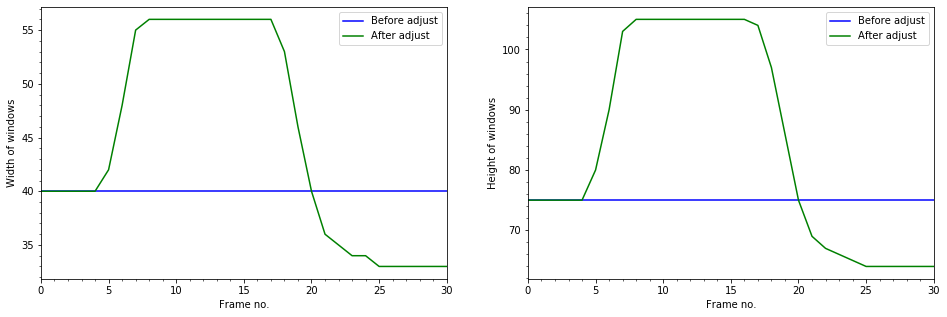

In [16]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
plt.plot(size_of_window.T[0][0],'b', label = 'Before adjust')
plt.plot(size_of_window.T[0][1],'g', label = 'After adjust')
plt.legend()
plt.xlabel('Frame no.')
plt.ylabel('Width of windows')
plt.xlim(0,30)
plt.gca().minorticks_on()

plt.subplot(1,2,2)
plt.plot(size_of_window.T[1][0],'b', label = 'Before adjust')
plt.plot(size_of_window.T[1][1],'g', label = 'After adjust')
plt.legend()
plt.xlabel('Frame no.')
plt.ylabel('Height of windows')
plt.xlim(0,30)
plt.gca().minorticks_on()
plt.show()